<a href="https://colab.research.google.com/github/sarthakchauhan0/CIFAR10-Analysis/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import cifar10

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the images
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Split the dataset into training and test sets
num_train = 40000
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]

# Define the KNN classifier
k = 10
knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='euclidean')

# Train the KNN classifier
knn.fit(X_train, y_train.ravel())

# Evaluate the KNN classifier on the training set
y_train_pred = knn.predict(X_train)
train_acc = np.mean(np.equal(y_train.ravel(), y_train_pred))
print('Train accuracy:', train_acc)

# Evaluate the KNN classifier on the validation set
y_val_pred = knn.predict(X_val)
val_acc = np.mean(np.equal(y_val.ravel(), y_val_pred))
print('Validation accuracy:', val_acc)


# Evaluate the KNN classifier on the test set
y_test_pred = knn.predict(X_test)
test_acc = np.mean(np.equal(y_test.ravel(), y_test_pred))
print('Test accuracy:', test_acc)


170498071/170498071 [==============================] - 4s 0us/step
Train accuracy: 0.42465
Validation accuracy: 0.3243
Test accuracy: 0.3368


In [2]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test.ravel(), y_test_pred)

# Print the confusion matrix
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[529   6 114  16  53   7  22   5 247   1]
 [126 179 125  36 186  30  65   6 228  19]
 [114   1 447  38 269  24  48   6  51   2]
 [ 63   2 250 188 229  86 118  11  49   4]
 [ 70   0 272  21 530  11  39  11  46   0]
 [ 50   4 224 131 216 211  91   9  58   6]
 [ 15   0 293  47 328  28 262   0  27   0]
 [ 86   3 180  51 311  48  51 192  66  12]
 [113   6  48  38  60  12  14   6 698   5]
 [126  36 105  46 138  18  67  16 316 132]]


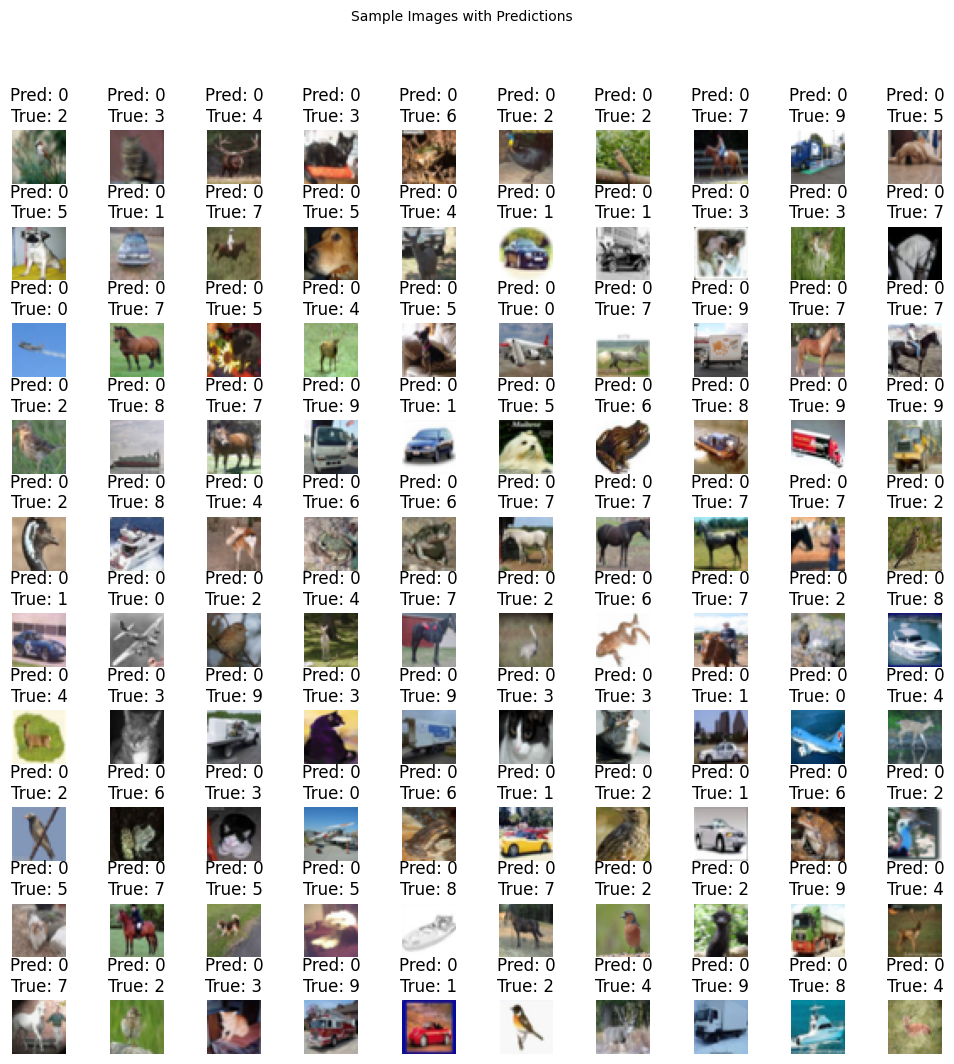

In [9]:
# Sample of predictions vs actual results made by our model. 
import matplotlib.pyplot as plt

# Get a random sample of 100 images from the test set
sample_indices = np.random.choice(np.arange(len(X_test)), size=100, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

# Make predictions on the sample images
y_pred = knn.predict(sample_images)
y_pred = y_pred.reshape(len(y_pred), 1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a 10x10 grid of subplots
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
fig.suptitle('Sample Images with Predictions', fontsize=10)
fig.subplots_adjust(hspace=0.8, wspace=0.8)

# Populate the grid with images and their predicted labels
for i in range(10):
    for j in range(10):
        idx = i * 10 + j
        ax[i, j].imshow(sample_images[idx].reshape(32, 32, 3))
        ax[i, j].axis('off')
        predicted_label = y_pred_classes[idx]
        true_label = sample_labels[idx][0]
        ax[i, j].set_title(f'Pred: {predicted_label}\nTrue: {true_label}')

plt.show()